In [24]:
#import the dataset with adding header names to the dataset and checking for null values stored as ?
import pandas as pd
#Train the gaussian naives basien model using the train data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.decomposition import PCA
bc = pd.read_csv("bcw.data",na_values="?",names=["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","class"])
bc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [35]:
#check the number of null values in the dataset
print(bc.isna().sum())

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
class                          0
dtype: int64


In [36]:
#Dividing the 2 classes into 2 dataframes to fill in missing values
grouped = bc.groupby(bc['class'])
bcb = grouped.get_group(2)
bcb2=bcb
bcb.head()
bcm=grouped.get_group(4)
bcm2=bcm
bcm.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
5,1017122,8,10,10,8,7,10.0,9,7,1,4
12,1041801,5,3,3,3,2,3.0,4,4,1,4
14,1044572,8,7,5,10,7,9.0,5,5,4,4
15,1047630,7,4,6,4,6,1.0,4,3,1,4
18,1050670,10,7,7,6,4,10.0,4,1,2,4


In [37]:
#Filling in missed values using respective means 
Bare_Nuclei_meanb=bcb["Bare Nuclei"].mean()
print(Bare_Nuclei_meanb)
bcb['Bare Nuclei']=bcb['Bare Nuclei'].fillna(Bare_Nuclei_meanb)
Bare_Nuclei_meanm=bcm["Bare Nuclei"].mean()
print(Bare_Nuclei_meanm)
bcm['Bare Nuclei']=bcm['Bare Nuclei'].fillna(Bare_Nuclei_meanm)
frames = [bcb,bcm]
bc3 = pd.concat(frames)

#Filling in missed values using respective modes 
Bare_Nuclei_modeb=bcb["Bare Nuclei"].mode()
print(Bare_Nuclei_modeb)
bcb2['Bare Nuclei']=bcb2['Bare Nuclei'].fillna(Bare_Nuclei_modeb)
Bare_Nuclei_modem=bcm["Bare Nuclei"].mode()
print(Bare_Nuclei_modem)
bcm2['Bare Nuclei']=bcm2['Bare Nuclei'].fillna(Bare_Nuclei_modem)
frames2 = [bcb2,bcm2]
bc4 = pd.concat(frames2)

1.4140287838779595
7.593731584479019
0    1.0
dtype: float64
0    10.0
dtype: float64


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [38]:
# Dropping missed values
bc2=bc.dropna()
bc=bc4

In [39]:
#divide the data into input values and target values
bc_x=bc.iloc[:,1:10]
bc_y=bc.iloc[:,10:11]
bc_y=pd.Series.ravel(bc_y)

bc2_x=bc2.iloc[:,1:10]
bc2_y=bc2.iloc[:,10:11]
bc2_y=pd.Series.ravel(bc2_y)

bc3_x=bc3.iloc[:,1:10]
bc3_y=bc3.iloc[:,10:11]
bc3_y=pd.Series.ravel(bc3_y)
bc2_x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [40]:
pca = PCA(n_components=2)
bc_x=pca.fit_transform(bc_x)
bc2_x=pca.fit_transform(bc2_x)
bc3_x=pca.fit_transform(bc3_x)

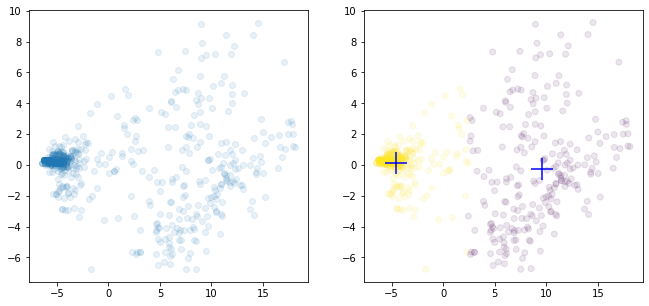

In [41]:
from fcmeans import FCM
fcm = FCM(n_clusters=2)
fcm.fit(bc_x)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(bc_x)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(bc_x[:,0], bc_x[:,1], alpha=.1)
axes[1].scatter(bc_x[:,0], bc_x[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='b')
plt.show()

In [44]:
df = pd.DataFrame({'actual':bc_y, 'predicted':fcm_labels})
df.loc[df['predicted'] == 1, 'predicted'] = 2 
df.loc[df['predicted'] == 0, 'predicted'] = 4 
df.loc[df['predicted']==df['actual'],'correct guess']=1
df.loc[df['predicted']!=df['actual'],'correct guess']=0
df.head()


,actual,predicted,correct guess
0,2,2,1.0
1,2,4,0.0
2,2,2,1.0
3,2,4,0.0
4,2,2,1.0


In [45]:
total=df['correct guess'].sum()
accuracy=total/699
print("accuracy of fuzzy c means clustering = %0.4f"%accuracy)

accuracy of fuzzy c means clustering = 0.9542
